Final Project  
Dataset of mathematics learning and assessment of higher education students using the MathE platform.

Downloading the dataset using google drive and gdown (library to download google drive files).

In [1]:
!pip install -q gdown
import gdown
import os
file_id = "1Zdn_evd9LJum4E7F6uqy0Gxt4r2wHKFR"
gdown.download(f"https://drive.google.com/uc?id={file_id}", output="MathE_dataset.zip", quiet=False)
!unzip -o MathE_dataset.zip -d MathE_dataset

Downloading...
From: https://drive.google.com/uc?id=1Zdn_evd9LJum4E7F6uqy0Gxt4r2wHKFR
To: /content/MathE_dataset.zip
100%|██████████| 72.4k/72.4k [00:00<00:00, 81.9MB/s]

Archive:  MathE_dataset.zip
  inflating: MathE_dataset/Machine Learning and Deep Learning Final Project Proposal.pdf  
  inflating: MathE_dataset/__MACOSX/._Machine Learning and Deep Learning Final Project Proposal.pdf  
  inflating: MathE_dataset/MathE dataset.csv  
  inflating: MathE_dataset/__MACOSX/._MathE dataset.csv  


Importing the file from the MathE dataset.csv file.

In [2]:
import pandas as pd
import numpy as np

DATAFILE_PATH = '/content/MathE_dataset/MathE dataset.csv'
encoding = 'cp437'

features = []
with open(DATAFILE_PATH, 'r', encoding=encoding) as f:
    for line in f:
        line_contents = line.split(';')
        ques_keywords_str = line_contents[7]
        ques_keywords_str = ques_keywords_str.strip() # removes \n
        keywords_list = ques_keywords_str.split(',')
        feature = {
            "Student ID": line_contents[0],
            "Student Country": line_contents[1],
            "Question ID": line_contents[2],
            "Type of Answers": line_contents[3],
            "Question Level": line_contents[4],
            "Topic": line_contents[5],
            "Subtopic": line_contents[6],
            "Keywords": keywords_list
        }
        features.append(feature)

# removing the header row
features = features[1:]

Showing some information about the data.

In [3]:
df = pd.DataFrame(features)
print(df.head().to_string())
print("\n")
df.info()
df.describe()

  Student ID Student Country Question ID Type of Answers Question Level       Topic    Subtopic                                                        Keywords
0        647         Ireland          77               0          Basic  Statistics  Statistics  [Stem and Leaf diagram, Relative frequency, Sample, Frequency]
1         41        Portugal          77               1          Basic  Statistics  Statistics  [Stem and Leaf diagram, Relative frequency, Sample, Frequency]
2        340        Portugal          77               1          Basic  Statistics  Statistics  [Stem and Leaf diagram, Relative frequency, Sample, Frequency]
3        641           Italy          77               0          Basic  Statistics  Statistics  [Stem and Leaf diagram, Relative frequency, Sample, Frequency]
4        669        Portugal          77               1          Basic  Statistics  Statistics  [Stem and Leaf diagram, Relative frequency, Sample, Frequency]


<class 'pandas.core.frame.DataFrame'>


,Student ID,Student Country,Question ID,Type of Answers,Question Level,Topic,Subtopic,Keywords
count,9546,9546,9546,9546,9546,9546,9546,9546
unique,372,8,833,2,2,14,24,365
top,1220,Portugal,459,0,Basic,Linear Algebra,Vector Spaces,"[Linear application, Linearity]"
freq,727,5495,103,5076,7844,5726,2749,443


Showing the total count of student by answer type.

In [4]:
# print(df["Student Country"].to_string())
uni = set()
for each in df["Student Country"]:
  uni.add(each)
print(uni)

{'Portugal', 'Romania', 'Russian Federation', 'Italy', 'Slovenia', 'Spain', 'Ireland', 'Lithuania'}


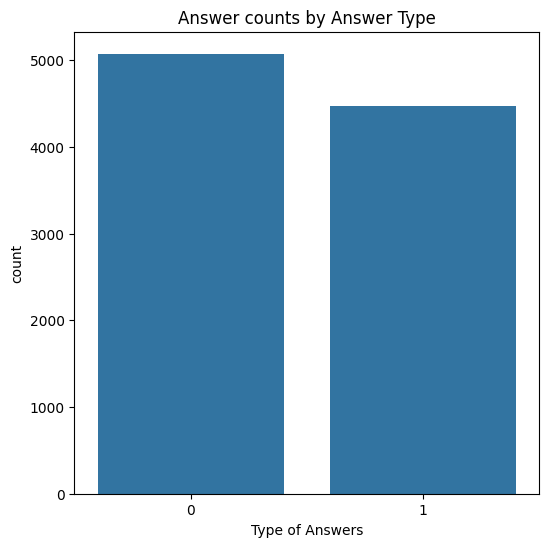

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
sns.countplot(data=df, x='Type of Answers')
plt.title('Answer counts by Answer Type')
plt.show()

Showing the total count of student by country.

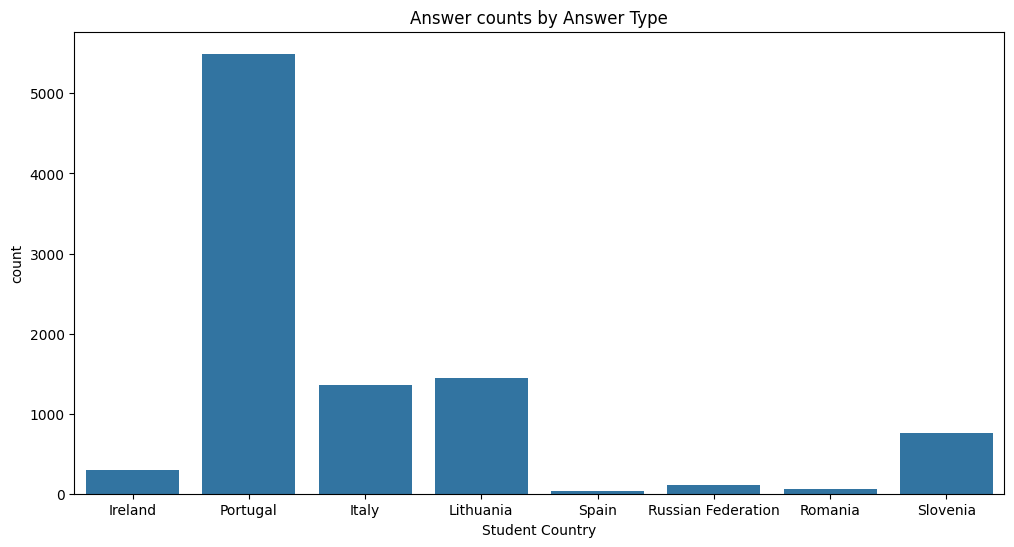

In [6]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Student Country')
plt.title('Answer counts by Answer Type')
plt.show()

Showing the total student count by question level(basic or advanced).

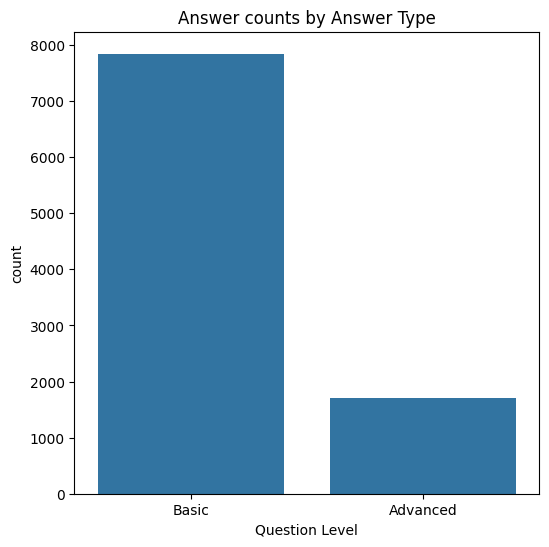

In [7]:
plt.figure(figsize=(6,6))
sns.countplot(data=df, x='Question Level')
plt.title('Answer counts by Answer Type')
plt.show()

Showing the number of students solving questions topic wise.

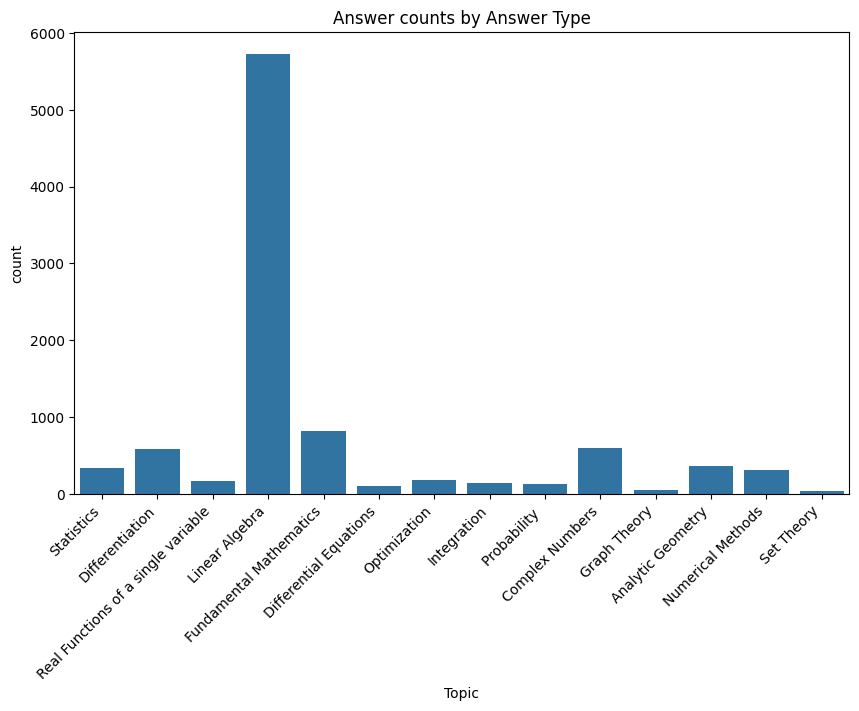

In [8]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Topic')
plt.title('Answer counts by Answer Type')
plt.xticks(rotation=45, ha='right')
plt.show()

Showing the number of students solving questions subtopic wise.

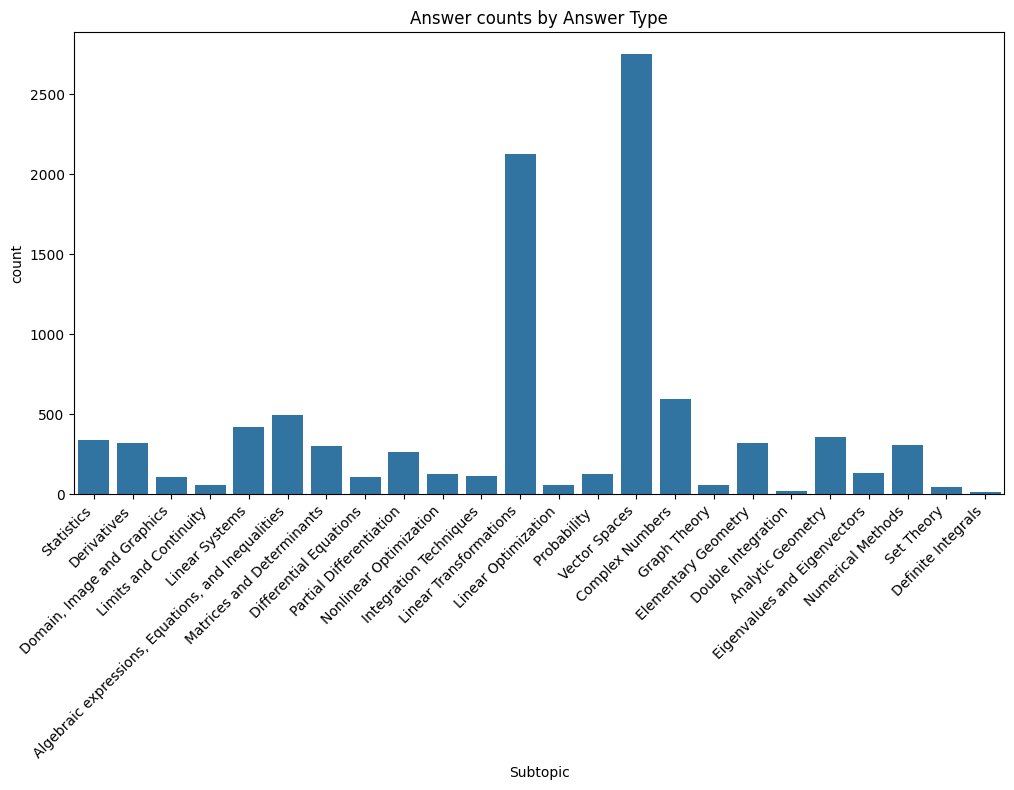

In [9]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Subtopic')
plt.title('Answer counts by Answer Type')
plt.xticks(rotation=45, ha='right')
plt.show()

Importing all the necessary libraries for preprocessing (includes data encoding/embedding), Machine learining models (XGBClassifier), visualizing for accuracy, confusion matrix using matplotlib

In [10]:
# Adding all the imports
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.metrics import confusion_matrix
import seaborn as sns

We have build three models.  
1st Model: Accuracy 68%.  
2nd Model: Accuracy 69%.  
3rd Model: Accuracy 72%.

The preprocessing is done very similarly in all of the three models and same model is used with some tweaks like changing the learning rate, number_of_classifier.  
So, I will explain all the major stuffs in the 3rd model.

This is the first model.  

  Student ID Student Country Question ID Question Level       Topic    Subtopic                                                        Keywords  Student Skill  Question Difficulty  Country Skill
0        647         Ireland          77          Basic  Statistics  Statistics  [Stem and Leaf diagram, Relative frequency, Sample, Frequency]       0.000000             0.538462       0.460000
1         41        Portugal          77          Basic  Statistics  Statistics  [Stem and Leaf diagram, Relative frequency, Sample, Frequency]       0.576271             0.538462       0.453867
2        340        Portugal          77          Basic  Statistics  Statistics  [Stem and Leaf diagram, Relative frequency, Sample, Frequency]       0.111111             0.538462       0.453867
3        641           Italy          77          Basic  Statistics  Statistics  [Stem and Leaf diagram, Relative frequency, Sample, Frequency]       0.285714             0.538462       0.446244
4        669        Portu

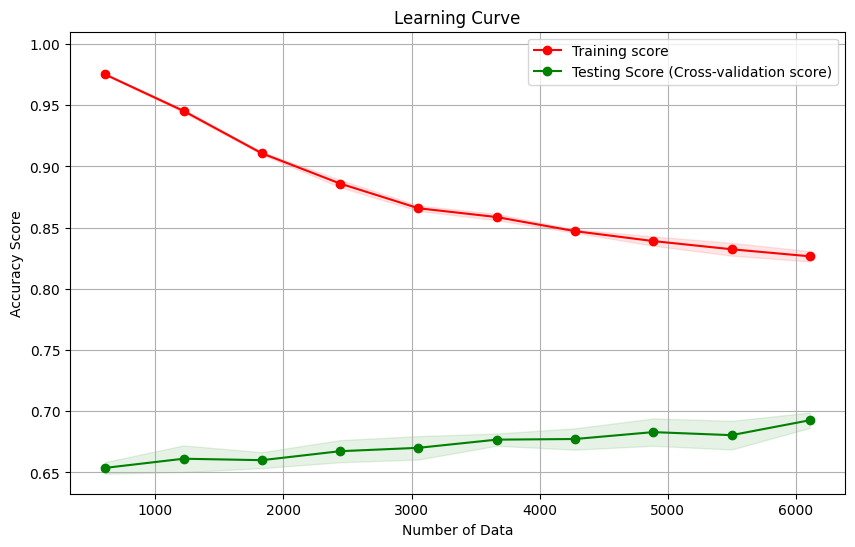


Accuracy (with cross validation): 0.6832460732984293


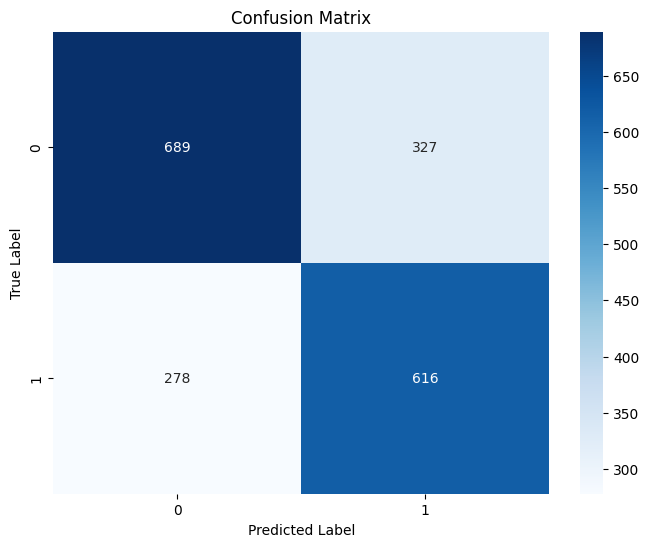

In [11]:
df = pd.DataFrame(features)

# converting to string
df["Student ID"] = df["Student ID"].astype(str)
df["Question ID"] = df["Question ID"].astype(str)
df["Type of Answers"] = df["Type of Answers"].astype(int)


# student skill: averaging correctness per student
student_skill = df.groupby("Student ID")["Type of Answers"].mean().to_dict()
# question difficulty: averaging incorrectness per question
question_difficulty = df.groupby("Question ID")["Type of Answers"].mean().to_dict()
# country skills
country_skill = df.groupby("Student Country")["Type of Answers"].mean().to_dict()

# adding new features
df["Student Skill"] = df["Student ID"].map(student_skill)
df["Question Difficulty"] = df["Question ID"].map(question_difficulty)
df["Country Skill"] = df["Student Country"].map(country_skill)

# X and y
y = df["Type of Answers"]
X = df.drop(columns=["Type of Answers"])
print(X.head().to_string())

# Custom tokenizer for keywords
kw_vectorizer = CountVectorizer(
    tokenizer=lambda x: x,
    preprocessor=lambda x: x,
    token_pattern=None,
    lowercase=False,
)

# categorical columns
categorical_cols = ["Student Country", "Question Level", "Topic", "Subtopic"]
# numerical columns
numerical_cols = ["Student Skill", "Question Difficulty", "Country Skill"]

# preprocessing
preprocessor = ColumnTransformer(transformers=[
    ("cat", OneHotEncoder(handle_unknown='ignore'), categorical_cols),
    ("kw", kw_vectorizer, "Keywords"),
    ("num", StandardScaler(), numerical_cols)
])

# building the model pipeline
model = XGBClassifier(
    n_estimators=400,
    max_depth=7,
    learning_rate=0.08,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

pipeline = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("classifier", model)
])

# splitting the data in training and testing, 80% and 20% respectively
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# fit and evaluate
pipeline.fit(X_train, y_train)
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]
y_pred = (y_pred_proba >= 0.5).astype(int)


print("-" * 30)

# plotting the learning curve
train_sizes_abs, train_scores, test_scores = learning_curve(
    pipeline,
    X_train,
    y_train,
    train_sizes=np.linspace(0.1, 1.0, 10), # proportion of training set to use
    cv=5,      # number of folds in cross-validation
    scoring='accuracy', # metric to evaluate
    n_jobs=-1,
    random_state=42 # ensure reproducibility for the CV splits
)

# calculating the mean and standard deviation of training and testing data
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)

test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# plotting the learning curve
plt.figure(figsize=(10, 6))
plt.grid()

# plotting the mean accuracy scores for training and test sets
plt.plot(train_sizes_abs, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes_abs, test_scores_mean, 'o-', color="g", label="Testing Score (Cross-validation score)")

# plotting the accuracy variability bands
plt.fill_between(train_sizes_abs, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes_abs, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.title("Learning Curve")
plt.xlabel("Number of Data")
plt.ylabel("Accuracy Score")
plt.legend(loc="best")
plt.ylim(None, 1.01) # Set y-axis limits if desired, e.g., focus on scores > 0.5
plt.show()

# predicting the model with the test data
p = pipeline.predict_proba(X_test)[:, 1]

# evaluating the model
print("\nAccuracy (with cross validation):", accuracy_score(y_test, (p >= 0.5).astype(int)))

# calculating the confusion matrix with heatmap
y_pred = (p >= 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


This is the second model.

  Student ID Student Country Question ID  Type of Answers Question Level       Topic    Subtopic                                                        Keywords  Student Skill  Question Difficulty
0        647         Ireland          77                0          Basic  Statistics  Statistics  [Stem and Leaf diagram, Relative frequency, Sample, Frequency]       0.000000             0.538462
1         41        Portugal          77                1          Basic  Statistics  Statistics  [Stem and Leaf diagram, Relative frequency, Sample, Frequency]       0.576271             0.538462
2        340        Portugal          77                1          Basic  Statistics  Statistics  [Stem and Leaf diagram, Relative frequency, Sample, Frequency]       0.111111             0.538462
3        641           Italy          77                0          Basic  Statistics  Statistics  [Stem and Leaf diagram, Relative frequency, Sample, Frequency]       0.285714             0.538462
4        669   

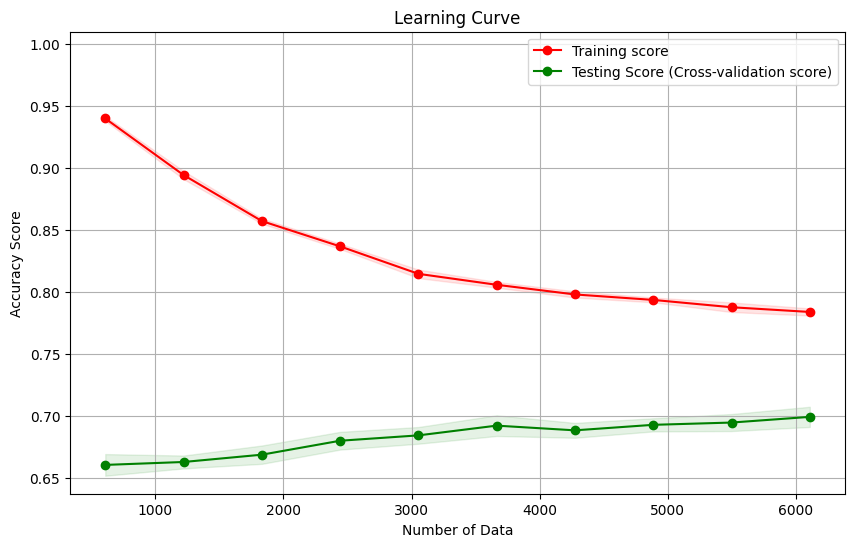


Accuracy (with cross validation): 0.6931937172774869


In [12]:
df = pd.DataFrame(features)

# converting to string
df["Student ID"] = df["Student ID"].astype(str)
df["Question ID"] = df["Question ID"].astype(str)
df["Type of Answers"] = df["Type of Answers"].astype(int)

# feature engineering: student Skill
student_correct_rate = df.groupby("Student ID")["Type of Answers"].mean().to_dict()
df["Student Skill"] = df["Student ID"].map(student_correct_rate)

#  feature Engineering: question Difficulty
question_correct_rate = df.groupby("Question ID")["Type of Answers"].mean().to_dict()
df["Question Difficulty"] = df["Question ID"].map(question_correct_rate)

# Target + Features
y = df["Type of Answers"]
x = df.drop(columns=["Type of Answers"])

print(df.head().to_string())
# Preprocessing
categorical_cols = ["Student ID", "Student Country", "Question ID", "Question Level", "Topic", "Subtopic"]

kw_vectorize = CountVectorizer(
    tokenizer=lambda x: x,
    preprocessor=lambda x: x,
    token_pattern=None,
    lowercase=False
)

preprocessing = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ("kw", kw_vectorize, "Keywords")
    ],
    remainder="passthrough"  # keeping the numerical features (Student Skill, Question Difficulty)
)

X_transformed = preprocessing.fit_transform(df)


# creating the model
model = XGBClassifier(
    n_estimators=400,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.9,
    colsample_bytree=0.8,
    gamma=0.2,
    min_child_weight=3,
    random_state=42,
    eval_metric='logloss'
)

pipeline = Pipeline(steps=[("preprocessing", preprocessing), ("model", model)])

# splitting the data in training and testing, 80% and 20% respectively
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)

# training the data
pipeline.fit(X_train, y_train)

# predicting the models accuracy using the testing data
p = pipeline.predict_proba(X_test)[:, 1]

print("-" * 30)


# plotting the learning curve
train_sizes_abs, train_scores, test_scores = learning_curve(
    pipeline,
    X_train,
    y_train,
    train_sizes=np.linspace(0.1, 1.0, 10), # proportion of training set to use
    cv=5,      # Number of folds in cross-validation
    scoring='accuracy', # Metric to evaluate
    n_jobs=-1,
    random_state=42 # ensure reproducibility for the CV splits
)

# calculating the mean and standard deviation of training and testing data
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)

test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# plotting the learning curve
plt.figure(figsize=(10, 6))
plt.grid()

# plotting the mean accuracy scores for training and test sets
plt.plot(train_sizes_abs, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes_abs, test_scores_mean, 'o-', color="g", label="Testing Score (Cross-validation score)")

# Plot the accuracy variability bands (optional)
plt.fill_between(train_sizes_abs, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes_abs, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.title("Learning Curve")
plt.xlabel("Number of Data")
plt.ylabel("Accuracy Score")
plt.legend(loc="best")
plt.ylim(None, 1.01) # Set y-axis limits if desired, e.g., focus on scores > 0.5
plt.show()

# predicting the model with the test data
p = pipeline.predict_proba(X_test)[:, 1]

# evaluating the model
print("\nAccuracy (with cross validation):", accuracy_score(y_test, (p >= 0.5).astype(int)))


# **This is the 3rd and FINAL MODEL**





Cleaning the data and adding some relations as a feature
For example: in the student_correct_rate, we are averaging for every student.  
We are also transformimg our data in X and y to show one is input (X) and another is output (y).

In [13]:
df = pd.DataFrame(features)

# converting to string
df["Student ID"] = df["Student ID"].astype(str)
df["Question ID"] = df["Question ID"].astype(str)
df["Type of Answers"] = df["Type of Answers"].astype(int)

# feature engineering
student_correct_rate = df.groupby("Student ID")["Type of Answers"].mean().to_dict()
df["Student Skill"] = df["Student ID"].map(student_correct_rate)

question_correct_rate = df.groupby("Question ID")["Type of Answers"].mean().to_dict()
df["Question Difficulty"] = df["Question ID"].map(question_correct_rate)

country_correct_rate = df.groupby("Student Country")["Type of Answers"].mean().to_dict()
df["Country Skill"] = df["Student Country"].map(country_correct_rate)

topic_correct_rate = df.groupby("Topic")["Type of Answers"].mean().to_dict()
df["Topic Difficulty"] = df["Topic"].map(topic_correct_rate)

y = df["Type of Answers"]
x = df.drop(columns=["Type of Answers"])

We are converting some data into one-hot-embedding, some to numerical, and some to TfidfVectorizer and merging all the embedding using ColumnTransformer.  

The TfidfVectorizer converts text into numbers by providing more importance to words that are unique and meaningful and less importance to common words.

In the above model(model 1 and model 2) we have used OneVectorizer. It counts the sum of each words.  

Then we fit the raw data in the ColumnTransformer which processes the data and sums all the converted encoding (Onehotencoding + kw_vectorize + numerical_encoding).

In [14]:
# Preprocessing using the onehotencoder and kw_vectorize
categorical_cols = ["Student ID", "Student Country", "Question ID", "Question Level", "Topic", "Subtopic"]

kw_vectorize = TfidfVectorizer(
    tokenizer=lambda x: x,
    preprocessor=lambda x: x,
    token_pattern=None,
    lowercase=False
)

preprocessing = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ("kw", kw_vectorize, "Keywords")
    ],
    remainder="passthrough"
)


# fitting the transformer and transformed data
# learns the categories, vocabulary etc. and applies the transformations
X_transformed = preprocessing.fit_transform(df)

# showing the transformed data
print("\nShape of Original Data:", df.shape)
print("-" * 30)
print("Transformed Data (X_transformed):")
print(X_transformed)
print("\nShape of Transformed Data:", X_transformed.shape)

feature_names = preprocessing.get_feature_names_out()
print("\nFeature Names after Transformation:")
print(feature_names)



Shape of Original Data: (9546, 12)
------------------------------
Transformed Data (X_transformed):
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 128270 stored elements and shape (9546, 1454)>
  Coords	Values
  (0, 276)	1.0
  (0, 372)	1.0
  (0, 1052)	1.0
  (0, 1214)	1.0
  (0, 1228)	1.0
  (0, 1251)	1.0
  (0, 1313)	0.4853840766780229
  (0, 1401)	0.5105351096235963
  (0, 1405)	0.4316746288789054
  (0, 1426)	0.5633943687429837
  (0, 1451)	0.5384615384615384
  (0, 1452)	0.46
  (0, 1453)	0.47941176470588237
  (1, 215)	1.0
  (1, 375)	1.0
  (1, 1052)	1.0
  (1, 1214)	1.0
  (1, 1228)	1.0
  (1, 1251)	1.0
  (1, 1313)	0.4853840766780229
  (1, 1401)	0.5105351096235963
  (1, 1405)	0.4316746288789054
  (1, 1426)	0.5633943687429837
  (1, 1449)	1.0
  (1, 1450)	0.576271186440678
  :	:
  (9544, 373)	1.0
  (9544, 560)	1.0
  (9544, 1214)	1.0
  (9544, 1219)	1.0
  (9544, 1229)	1.0
  (9544, 1348)	0.6737318717466682
  (9544, 1393)	0.6737318717466682
  (9544, 1416)	0.3035963273583233
  (9544, 14

Building the XGB Classifier model using 500 classifiers, and the learning rate of 0.0009.  
Splitting the data in training and testing, 80% and 20% respectively
We then fit the data into the model where the model learns about the data.

Note: The remainder is the numerical data which are extra features added while feature engineering.

In [15]:
# tuned XGBoost model
model = XGBClassifier(
    n_estimators=500,
    learning_rate=0.0009,
    subsample=0.9,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='logloss'
)

pipeline = Pipeline(steps=[("preprocessing", preprocessing), ("model", model)])

# splitting the data in training and testing, 80% and 20% respectively
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y)

# training the model
pipeline.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Student ID',
                                                   'Student Country',
                                                   'Question ID',
                                                   'Question Level', 'Topic',
                                                   'Subtopic']),
                                                 ('kw',
                                                  TfidfVectorizer(lowercase=False,
                                                                  preprocessor=<function <lambda> at 0x7b0a72a98cc0>,
                                                                  token_pattern=None,
                                                                  tokenizer=<function <lambda> at 0...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None,
                               learning_rate=0.0009, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=None,
                               max_leaves=None, min_child_weight=None,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=500,
                               n_jobs=None, num_parallel_tree=None,
                               random_state=42, ...))])

Plotting the data in the chart.  
Predicting the accuracy of the data.  
Creating a confusion matrix with the heat map.

------------------------------


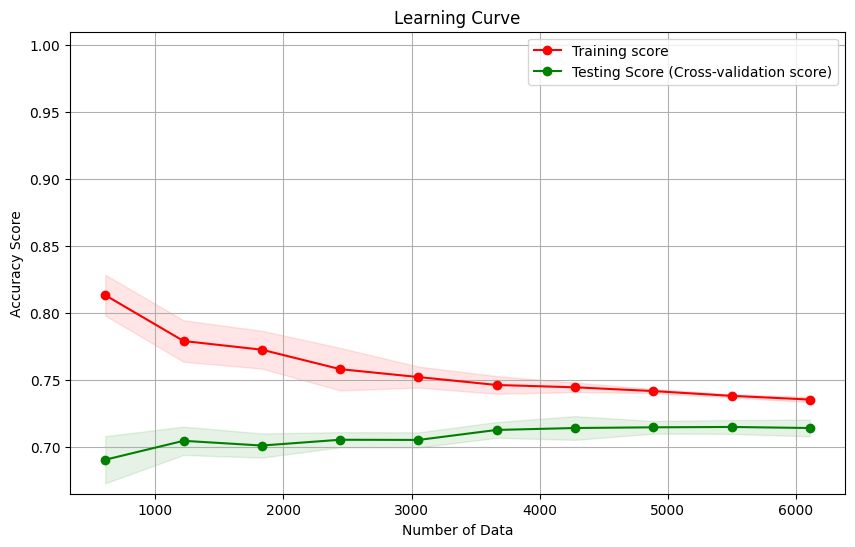


Accuracy (with cross validation): 0.7235602094240837


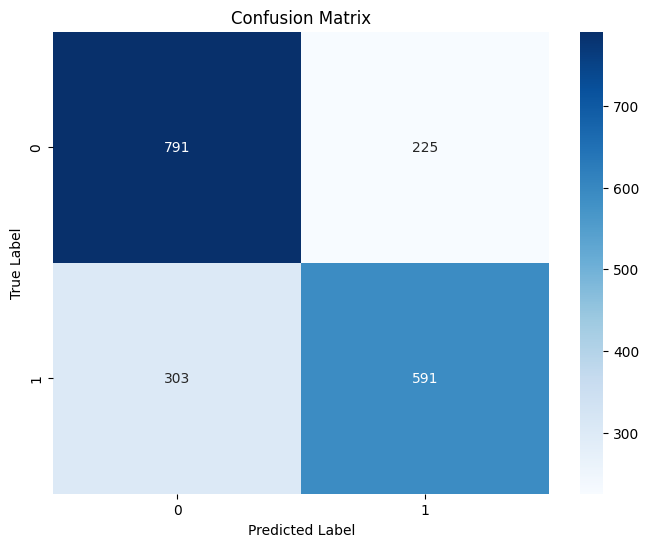

In [16]:
print("-" * 30)
# plotting the learning curve
train_sizes_abs, train_scores, test_scores = learning_curve(
    pipeline,
    X_train,
    y_train,
    train_sizes=np.linspace(0.1, 1.0, 10), # proportion of training set to use
    cv=5,      # number of folds in cross-validation
    scoring='accuracy', # metric to evaluate
    n_jobs=-1,
    random_state=42, # ensure reproducibility for the CV splits
    shuffle=True
)

# calculating the mean and standard deviation of training and testing data
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)

test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# plotting the learning curve
plt.figure(figsize=(10, 6))
plt.grid()

# plotting the mean accuracy scores for training and test sets
plt.plot(train_sizes_abs, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes_abs, test_scores_mean, 'o-', color="g", label="Testing Score (Cross-validation score)")

# plotting the accuracy variability bands
plt.fill_between(train_sizes_abs, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes_abs, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.title("Learning Curve")
plt.xlabel("Number of Data")
plt.ylabel("Accuracy Score")
plt.legend(loc="best")
plt.ylim(None, 1.01)
plt.show()

# predicting the model with the test data
p = pipeline.predict_proba(X_test)[:, 1]

# evaluating the model
print("\nAccuracy (with cross validation):", accuracy_score(y_test, (p >= 0.5).astype(int)))

from sklearn.metrics import confusion_matrix
import seaborn as sns

# calculating the confusion matrix with heatmap
y_pred = (p >= 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()